In [65]:
import torch
import torch.nn as nn 
import torch.nn.functional as f 
from sklearn.model_selection import train_test_split 
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib_inline
import scipy.stats as stats
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [83]:
data = pd.read_csv('mnist_train.csv')
data = data.values

In [84]:
labels = data[:,0]
data = data[:,1:]


In [85]:
# converting data to tensor
dataT = torch.tensor(data).float()
labelsT = torch.tensor(labels).long()

# train and test Split
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, test_size = .2)


# normalizing

## 0
train_data = train_data/torch.max(train_data)
test_data = test_data/torch.max(test_data)

## 1
# train_data = train_data/torch.max(train_data)
# # test_data = test_data/torch.max(test_data)

## 2
# # train_data = train_data/torch.max(train_data)
# test_data = test_data/torch.max(test_data)

print(f"The range of train_data is {torch.min(train_data)} : {torch.max(train_data)}")
print(f"The range of test_data is {torch.min(test_data)} : {torch.max(test_data)}")

# Tensor dataset
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Data Loaders 
train_loader = DataLoader(train_data, batch_size = 32)
test_loader = DataLoader(test_data, batch_size = len(test_data))




The range of train_data is 0.0 : 1.0
The range of test_data is 0.0 : 1.0


In [86]:
def createMNISTnet():

    class MNISTnet(nn.Module):

        def __init__(self):
            super().__init__()

            # input layer 
            self.input = nn.Linear(784, 64)

            # hidden layer 
            self.fc1 = nn.Linear(64, 32)
            self.fc2 = nn.Linear(32, 32)

            # output layer 
            self.output = nn.Linear(32, 10)

        def forward(self, X):

            X = f.relu(self.input(X))
            X = f.relu(self.fc1(X))
            X = f.relu(self.fc2(X))

            return self.output(X)
        
    
    net = MNISTnet()

    # loss function 
    lossfun = nn.CrossEntropyLoss()

    # optimizer 
    optimizer = torch.optim.Adam(net.parameters(), lr = .01)

    return net, lossfun, optimizer

            

            

In [87]:

def function2TrainModel():

    numepochs = 60
    net, lossfun, optimizer = createMNISTnet()

    testAcc = []
    trainAcc = []
    losses = np.zeros(numepochs)
    lossesT = np.zeros(numepochs)

    for i in range(numepochs):
        
        # switching on training mode
        net.train()

        # keeping track of losses and accuracy(batch-wise) 
        batchLoss = []
        batchAcc = []

        for X, y in train_loader:

            # forward pass and calculation of loss
            yHat = net(X)
            loss = lossfun(yHat, y)
            # appending the loss 
            batchLoss.append(loss.item())

            # backward propogation 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            

            # calculating the accuracy
            matches = (torch.argmax(yHat, axis = 1) == y).float()
            accuracyPct = 100*torch.mean(matches)
            batchAcc.append(accuracyPct)


        # taking the mean of batch loss and batch accuracy        
        losses[i] = np.mean(batchLoss)
        trainAcc.append(np.mean(batchAcc))

        # evaluating each epoch
        net.eval()
        X, y = next(iter(test_loader))
        with torch.inference_mode():
            yHat = net(X)
            loss = lossfun(yHat, y)
            lossesT[i] = loss
            # calculating the accuracy
            matches = (torch.argmax(yHat, axis = 1) == y).float()
            accuracyPct = 100*torch.mean(matches)
            testAcc.append(accuracyPct)
        
    return trainAcc, testAcc, losses, lossesT, net




In [88]:
trainAcc, testAcc, losses,lossesT, net = function2TrainModel()

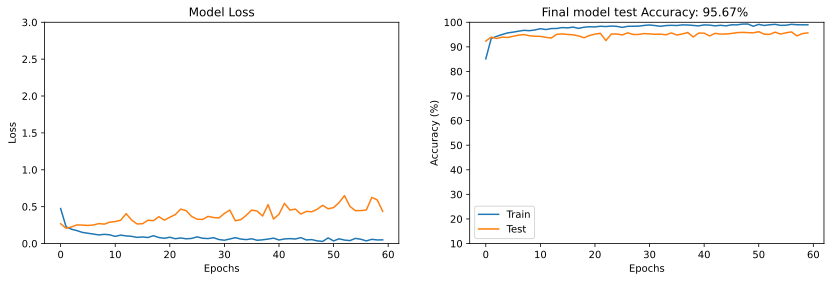

In [82]:
# Challenge part 0

fig, ax = plt.subplots(1,2, figsize = (14,4))

ax[0].plot(losses)
ax[0].plot(lossesT)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model Loss')

ax[1].plot(trainAcc, label = 'Train')
ax[1].plot(testAcc, label = 'Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test Accuracy: {testAcc[-1]:.2f}% ')
ax[1].legend()

plt.show()

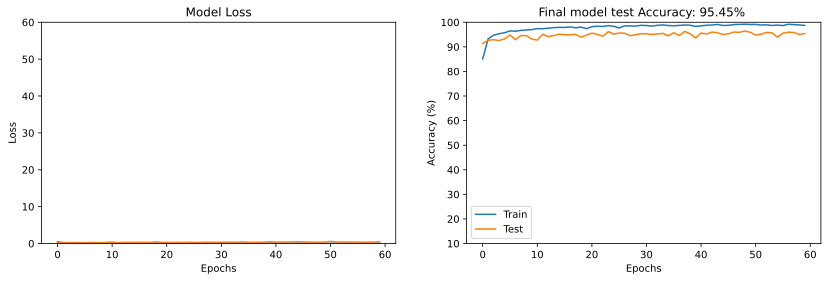

In [91]:
# Challenge part 1

fig, ax = plt.subplots(1,2, figsize = (14,4))

ax[0].plot(losses)
ax[0].plot(lossesT)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,60])
ax[0].set_title('Model Loss')

ax[1].plot(trainAcc, label = 'Train')
ax[1].plot(testAcc, label = 'Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test Accuracy: {testAcc[-1]:.2f}% ')
ax[1].legend()

plt.show()

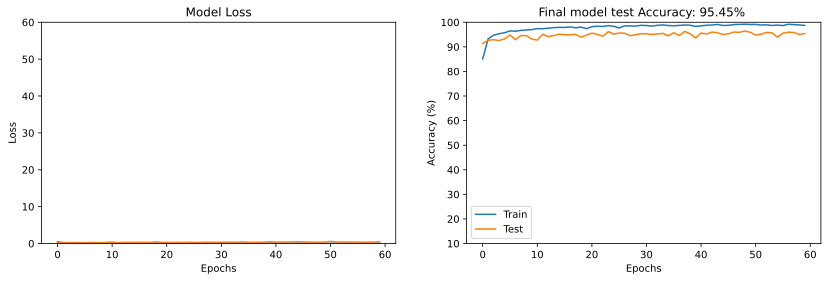

In [90]:
# Challenge part 2

fig, ax = plt.subplots(1,2, figsize = (14,4))

ax[0].plot(losses)
ax[0].plot(lossesT)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,60])
ax[0].set_title('Model Loss')

ax[1].plot(trainAcc, label = 'Train')
ax[1].plot(testAcc, label = 'Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test Accuracy: {testAcc[-1]:.2f}% ')
ax[1].legend()

plt.show()